$~$

# **Introduction to Regression with statsmodels in Python**
____
$~$

### Notes from the course [Introduction to Regression with statsmodels in Python](https://www.datacamp.com/courses/introduction-to-regression-with-statsmodels-in-python)

$~$

____

*Learning how to make predictions from a dataset, quantify model performance, and diagnose problems with model fit.*

Learning objetives:
+ Simple Linear Regression Modeling 
+ Predictions and model objects
+ Assessing model fit
+ Simple Logistic Regression Modeling

$~$
___

$~$

## Simple Linear Regression Modeling 

$~$

$~$

+ terminology:


    +   **The response variable (Y):**, the one you want to make predictions on, is also known as the dependent variable or the y variable. (These two terms are completely interchangeable). 
    
    +   **Explanatory variables (X):**, used to explain how the predictions will change, are also known as independent variables or x variables (these terms are interchangeable)

    + **Linear regression:** is used when the response variable is numeric, like in the motor insurance dataset. 
    
    + **Logistic regression:** is used when the response variable is logical. That is, it takes True or False values

    + **The intercept:** is the *y* value when *x* is zero. 
    + **The slope:** is the steepness of the line, equal to the amount *y* increases if you increase *x* by one. (The slope tells you by how much the response variable is expected to change if the explanatory variable increases by one unit.)
    + **The equation** for a straight line is that the *y* value is the intercept plus the slope times the *x* value.
        + *y* = intercept + slope *  *x*
        
        $~$

    + **Regression to the mean**: "*extreme cases don't persist over time*". it is a property of the data, not a type of model, but linear regression can be used to quantify its effect. 
_____
$~$

+ tips:

    + Before you start running regression models, it's a good idea to visualize your dataset. To visualize the relationship between two numeric variables, you can use a **scatter plot**
    + Add a trend line to the scatter plot.
$~$ 

$~$

## Predictions and model objects

$~$

In [1]:
import pandas as pd
import kaggle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from statsmodels.formula.api import ols

sns.set_context("talk")
plt.style.use('ggplot')



*I am going to reproduce the exercises all exercises of the course, but using a different dataset*
___
$~$

For this exercice we are going to use this [Seoul Real Estate Datasets](https://www.kaggle.com/datasets/jcy1996/seoul-real-estate-datasets?select=seoul+-+SeoulRealEstate.csv)

$~$
___

### Downloading and cleaning the dataset:

$~$

In [18]:
PATH = "./data"

In [20]:
if not os.path.exists(PATH):
    os.makedirs(PATH)
if not os.listdir(PATH):
    !kaggle datasets download -d "argonalyst/sao-paulo-real-estate-sale-rent-april-2019" --unzip -p $PATH


100%|████████████████████████████████████████| 206k/206k [00:00<00:00, 1.27MB/s]
100%|████████████████████████████████████████| 206k/206k [00:00<00:00, 1.27MB/s]


In [21]:

files = [os.path.join(PATH, f) for f in os.listdir(PATH)]
for f in files:
    print(f)


./data/sao-paulo-properties-april-2019.csv


In [22]:
df = pd.read_csv(files[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [23]:
df.head()


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [51]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [24]:
# # remove spaces in columns name (chance the name of the columns)
# df.columns = df.columns.str.replace(' ','_')
# df.columns = df.columns.str.replace('/','_')
# df.columns = df.columns.str.replace('\n','_')
# df.columns = df.columns.str.replace('(','_')
# df.columns = df.columns.str.replace(')','_')



# #transfor "Sale Price_bid_price" to type int64
# df["Sale_Price_bid_price"] = pd.to_numeric(df["Sale_Price_bid_price"].str.replace('[^.0-9]', ''))
# #transfor year type to int
# df["yearBuilt"] = pd.to_numeric(df["yearBuilt"])
# print(df.yearBuilt.describe())

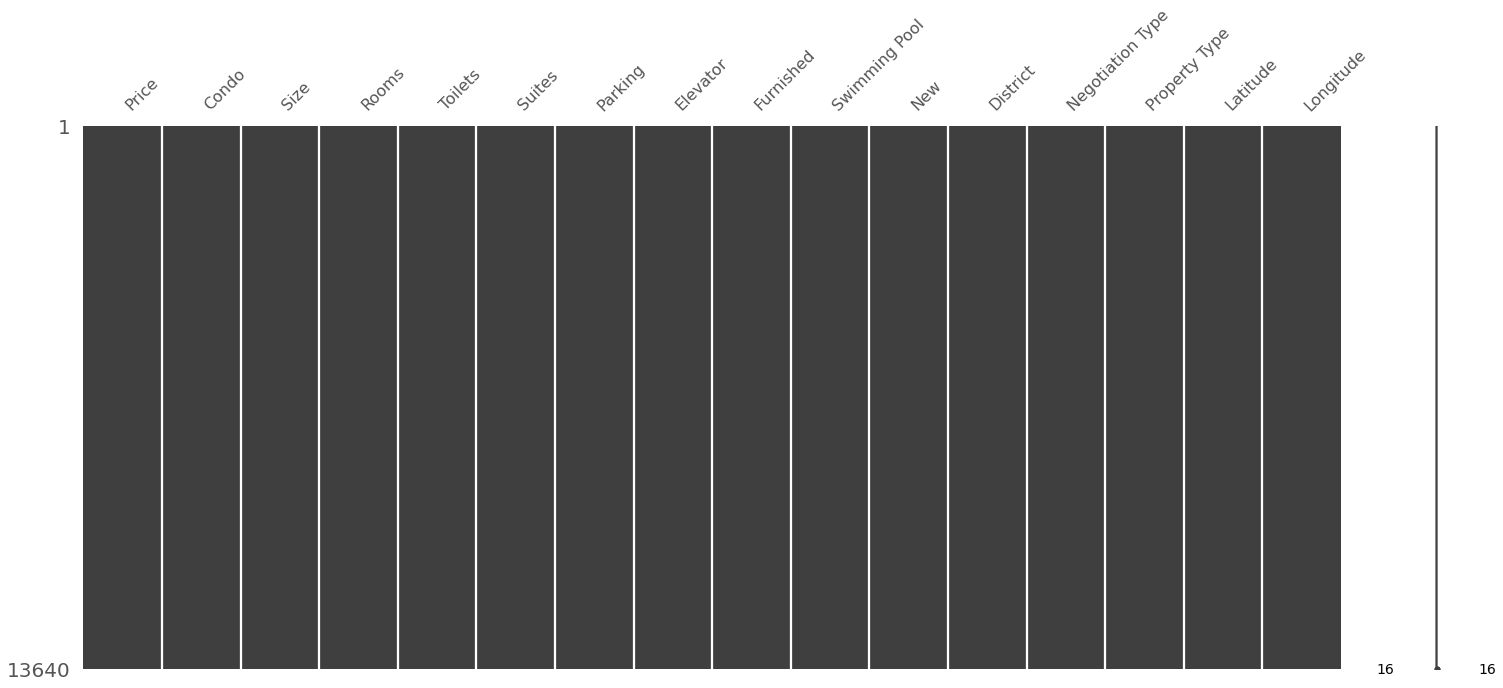

In [25]:
#cheking for missing values:
msno.matrix(df)
plt.show()


In [70]:
# check for the Missing values by column:
df.isnull().sum()


Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming_Pool       0
New                 0
District            0
Negotiation_Type    0
Property_Type       0
Latitude            0
Longitude           0
dtype: int64

___

### Visualizing two numeric variables:

$~$

*Scatter plots are the standard way to visualize the relationship between two numeric variables*


$~$
let's define our target variable:


+ Y = "Sale Price/bid price"

$~$

from here we can draw a plot of our target variable versus any other numeric variable:

$~$



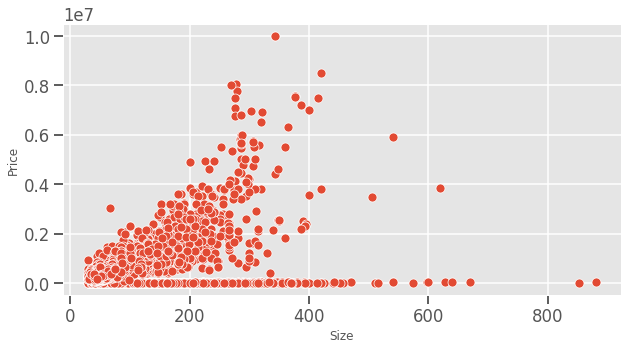

In [97]:
# Draw the scatter plot
 
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x="Size", y="Price",data=df)
plt.show()

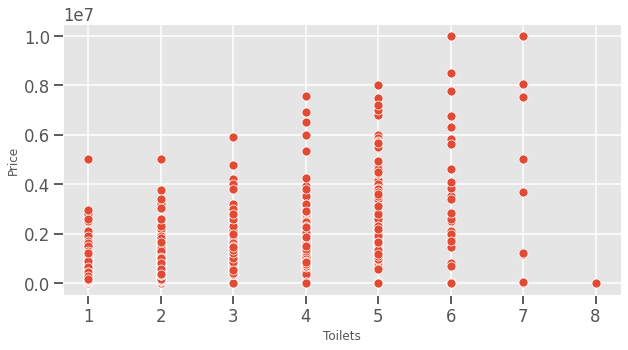

In [54]:
# Draw the scatter plot
 
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x="Toilets", y="Price",data=df)
plt.show()

$~$

Draw a trend line on the scatter plot:

$~$


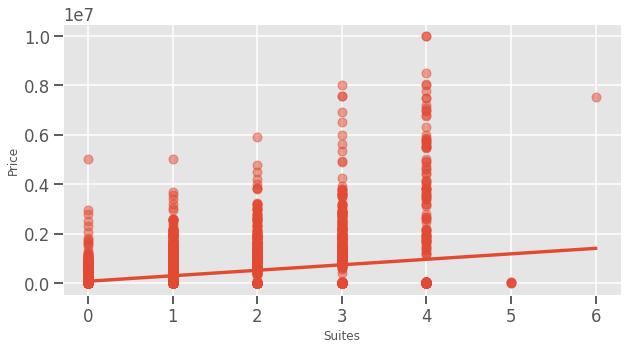

In [55]:
fig = plt.figure(figsize=(10,5))

sns.regplot(x="Suites",
         y="Price",
         data=df,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.show()

$~$

### Linear regression with ols(): Price vs Elevator

$~$

In [56]:
# Create the model object

regres_1 = ols("Price ~ Elevator", data=df)
# Fit the model

regres_1 = regres_1.fit()

# Print the parameters of the fitted model

print(regres_1.params)


Intercept    242894.557157
Elevator     126611.802602
dtype: float64


$~$

### Categorical explanatory variables:

$~$


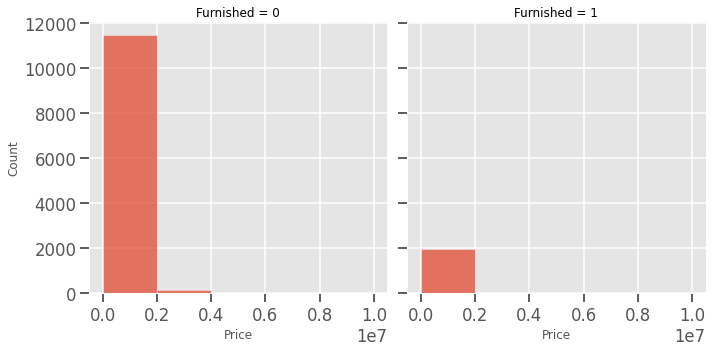

In [61]:
# Histograms of Sale_Price_bid_price with 10 bins, split by decade

_= sns.displot(data=df, x="Price",
            col="Furnished",
            bins=5)

# Show the plot
plt.show()


$~$

It appears that funished houses are the most expensive on average, and non funished  ones are the cheapest.

$~$

$~$

### Calculating means by category

$~$


In [42]:
# Calculate the mean of price, grouped by funished
mean_price_by_funished = df.groupby("Furnished")["Price"].mean()

# Print the result
print(mean_price_by_funished)

Furnished
0    289302.363207
1    278642.594905
Name: Price, dtype: float64


$~$

### Linear regression with a categorical explanatory variable

$~$


In [77]:
# Create the model, fit it
price_vs_funished = ols("Price ~ Negotiation_Type", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Intercept                     3077.669065
Negotiation_Type[T.sale]    605546.470985
dtype: float64


In [80]:
# Create the model, fit it
price_vs_funished = ols("Price ~ Furnished ", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Intercept    289302.363207
Furnished    -10659.768302
dtype: float64


In [82]:
# Update the model formula to remove the intercept

price_vs_funished = ols("Price ~ Furnished +0 ", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Furnished    278642.594905
dtype: float64


In [83]:
# Calculate the mean of price, grouped by funished
mean_price_by_funished = df.groupby("Furnished")["Price"].mean()

# Print the result
print(mean_price_by_funished)

Furnished
0    289302.363207
1    278642.594905
Name: Price, dtype: float64


$~$

**The coefficient of the model is just the means**

$~$


$~$

## Predictions and model objects

$~$

$~$


Print the fitted values:


$~$


In [85]:
print(price_vs_funished.fittedvalues)

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
             ...      
13635         0.000000
13636         0.000000
13637         0.000000
13638    278642.594905
13639         0.000000
Length: 13640, dtype: float64


In [86]:
print(regres_1.fittedvalues)

0        242894.557157
1        242894.557157
2        242894.557157
3        242894.557157
4        369506.359760
             ...      
13635    242894.557157
13636    242894.557157
13637    242894.557157
13638    242894.557157
13639    242894.557157
Length: 13640, dtype: float64


$~$

Print the residuals:

$~$

In [87]:
print(regres_1.resid)

0       -241964.557157
1       -241894.557157
2       -241894.557157
3       -241894.557157
4       -368206.359760
             ...      
13635     22105.442843
13636    302105.442843
13637    272105.442843
13638    102105.442843
13639    -80907.557157
Length: 13640, dtype: float64


$~$

Print the summary:

$~$

In [89]:
print(regres_1.summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           3.51e-33
Time:                        21:51:10   Log-Likelihood:            -2.0055e+05
No. Observations:               13640   AIC:                         4.011e+05
Df Residuals:                   13638   BIC:                         4.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.429e+05   6262.037     38.788      0.0

$~$

### Transforming the variables
$~$

In [94]:
df["sqrt_size"] = np.sqrt(df["Size"])
df["sqrt_price"] = np.sqrt(df["Price"])

<AxesSubplot:xlabel='sqrt_size', ylabel='sqrt_price'>

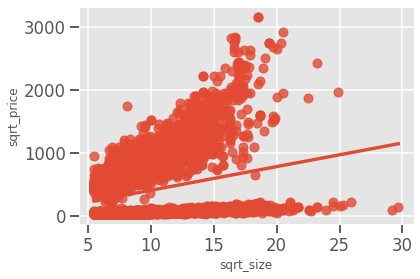

In [95]:
sns.regplot(x="sqrt_size", y="sqrt_price", data=df,
            ci=None)


$~$

##  Assessing model fit 

$~$

$~$

##   Simple Logistic Regression Modeling 

$~$